In [1]:
import numpy as np
import tensorflow as tf

C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class TimeSeriesData():
    def __init__(self, num_points,Xmin,Xmax):
        self.Xmin = Xmin
        self.Xmax = Xmax
        self.num_points = num_points
        self.resolution = (Xmax - Xmin) / num_points
        self.x_data = np.linspace(Xmin,Xmax, num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch = False):
        
        rand_start = np.random.rand(batch_size,1)
        
        ts_start = rand_start * (self.Xmax - self.Xmin - steps * self.resolution)
        
        batch_ts = ts_start + np.arange(0.0, steps + 1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        
        if return_batch:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)

In [4]:
ts_data = TimeSeriesData(250,0,10)

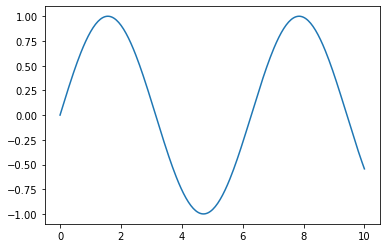

In [5]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [6]:
num_time_steps = 30

In [7]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

In [8]:
ts

array([[6.47801273, 6.51801273, 6.55801273, 6.59801273, 6.63801273,
        6.67801273, 6.71801273, 6.75801273, 6.79801273, 6.83801273,
        6.87801273, 6.91801273, 6.95801273, 6.99801273, 7.03801273,
        7.07801273, 7.11801273, 7.15801273, 7.19801273, 7.23801273,
        7.27801273, 7.31801273, 7.35801273, 7.39801273, 7.43801273,
        7.47801273, 7.51801273, 7.55801273, 7.59801273, 7.63801273,
        7.67801273]])

In [9]:
ts.shape

(1, 31)

In [10]:
ts.flatten().shape

(31,)

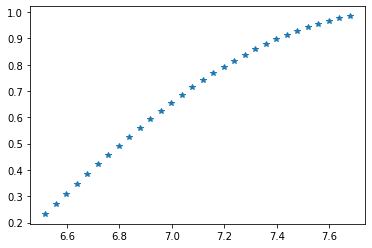

In [11]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

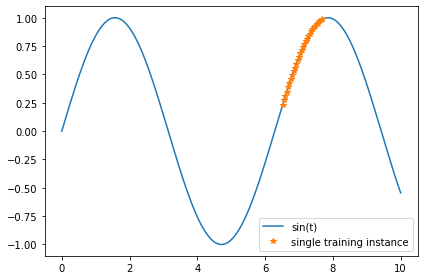

In [12]:
plt.plot(ts_data.x_data,ts_data.y_true,label = 'sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label = "single training instance")

plt.tight_layout()
plt.legend()

In [13]:
# Training Data

In [14]:
train_inst = np.linspace(5, 5 + ts_data.resolution * (num_time_steps + 1), num_time_steps + 1)

In [15]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

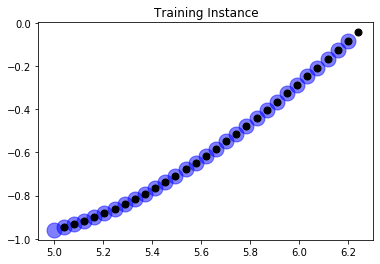

In [16]:
plt.title('Training Instance')

plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize = 15, alpha = 0.5, label = 'instance')
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), 'ko', markersize = 7, label = 'Target')

In [17]:
tf.reset_default_graph()

In [18]:
num_inputs = 1
num_neurons = 100
num_outpus = 1
lr = 0.0001
epochs = 2000
batch_size = 1

In [19]:
#placeholder 

x = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])

y = tf.placeholder(tf.float32,[None,num_time_steps,num_outpus])

In [20]:
# RNN Cell Layer

In [21]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell
                                              (num_units = num_neurons, activation = tf.nn.relu)
                                              , output_size = num_outpus)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [22]:
outputs, states = tf.nn.dynamic_rnn(cell,x,dtype = tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
loss = tf.reduce_mean(tf.square(outputs - y))

In [24]:
optimizer = tf.train.AdamOptimizer(lr)

In [25]:
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [26]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.75)

saver = tf.train.Saver()

In [27]:
with tf.Session(config= tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iter in range(epochs):
        
        x_batch, y_batch = ts_data.next_batch(batch_size,num_time_steps)
        
        sess.run(train, feed_dict = {x: x_batch, y: y_batch})
        
        if iter % 100 == 0:
            mse = loss.eval(feed_dict= {x: x_batch, y: y_batch})
            
            print(iter,"\t MSE: ",mse)
    
    saver.save(sess,"./rnn_ts_model")

0 	 MSE:  0.36309764
100 	 MSE:  0.08806956
200 	 MSE:  0.091032095
300 	 MSE:  0.011882701
400 	 MSE:  0.04932676
500 	 MSE:  0.008830463
600 	 MSE:  0.035501268
700 	 MSE:  0.032265697
800 	 MSE:  0.0017342592
900 	 MSE:  0.0075591346
1000 	 MSE:  0.024759045
1100 	 MSE:  0.027465858
1200 	 MSE:  0.0137335975
1300 	 MSE:  0.00058953126
1400 	 MSE:  0.011523447
1500 	 MSE:  0.014910647
1600 	 MSE:  0.0060434546
1700 	 MSE:  0.0008461952
1800 	 MSE:  0.0057963533
1900 	 MSE:  0.0025069315


In [28]:
with tf.Session() as sess:
    saver.restore(sess,'./rnn_ts_model')
    
    x_new = np.sin(np.array(train_inst[:-1].reshape(-1,num_time_steps,num_inputs)))
    
    y_pred = sess.run(outputs, feed_dict = {x:x_new})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./rnn_ts_model


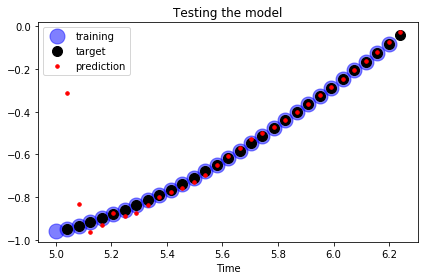

In [29]:
plt.title("Testing the model")

plt.plot(train_inst[:-1], np.sin(train_inst[:-1]), 'bo', markersize=15,alpha = 0.5,label = "training")

plt.plot(train_inst[1:], np.sin(train_inst[1:]), 'ko', markersize=10,label = 'target')

plt.plot(train_inst[1:], y_pred[0,:,0], 'r.', markersize = 7, label = "prediction")

plt.xlabel("Time")
plt.legend()
plt.tight_layout()

## Generation New Sequnce

In [31]:
with tf.Session() as sess:
    
    saver.restore(sess,'./rnn_ts_model')
    
#     seed Zeros
    zero_seq_seed = [0.0 for i in range(num_time_steps)]
    
    for iter in range(len(ts_data.x_data) - num_time_steps):
        
        x_batch = np.array(zero_seq_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        
        y_pred = sess.run(outputs, feed_dict = {x: x_batch})
        
        zero_seq_seed.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./rnn_ts_model


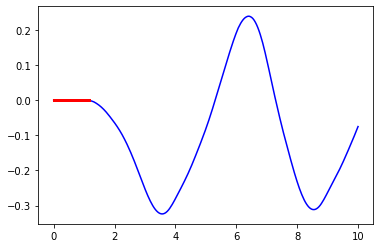

In [32]:
plt.plot(ts_data.x_data, zero_seq_seed, 'b-')
plt.plot(ts_data.x_data[:num_time_steps],zero_seq_seed[:num_time_steps],'r',linewidth = 3)

In [33]:
with tf.Session() as sess:
    
    saver.restore(sess,'./rnn_ts_model')
    
#     seed Zeros
    training_instance = list(ts_data.y_true[:30])
    
    for iter in range(len(training_instance) - num_time_steps):
        
        x_batch = np.array(training_instance[-num_time_steps:]).reshape(1,num_time_steps,1)
        
        y_pred = sess.run(outputs, feed_dict = {x: x_batch})
        
        training_instance.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./rnn_ts_model


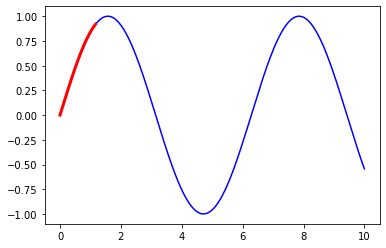

In [34]:
plt.plot(ts_data.x_data, ts_data.y_true, 'b-')
plt.plot(ts_data.x_data[:num_time_steps],training_instance[:num_time_steps],'r',linewidth = 3)